In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamond-price-prediciton-2024/train.csv
/kaggle/input/diamond-price-prediciton-2024/test.csv
/kaggle/input/diamonds/diamonds.csv


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
test = pd.read_csv("/kaggle/input/diamond-price-prediciton-2024/test.csv")

train = pd.read_csv("/kaggle/input/diamond-price-prediciton-2024/train.csv")

In [148]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [149]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [151]:
train['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [63]:
test['cut'].value_counts()

cut
Ideal        4348
Premium      2678
Very Good    2424
Good         1025
Fair          313
Name: count, dtype: int64

In [152]:
train['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [153]:
train['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [64]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [115]:
train.drop('Id',axis=1,inplace=True)
#train.drop('Unnamed: 0',axis=1,inplace=True)


In [116]:
train = train.drop_duplicates(keep='first')
#test = test.drop_duplicates(keep='first')


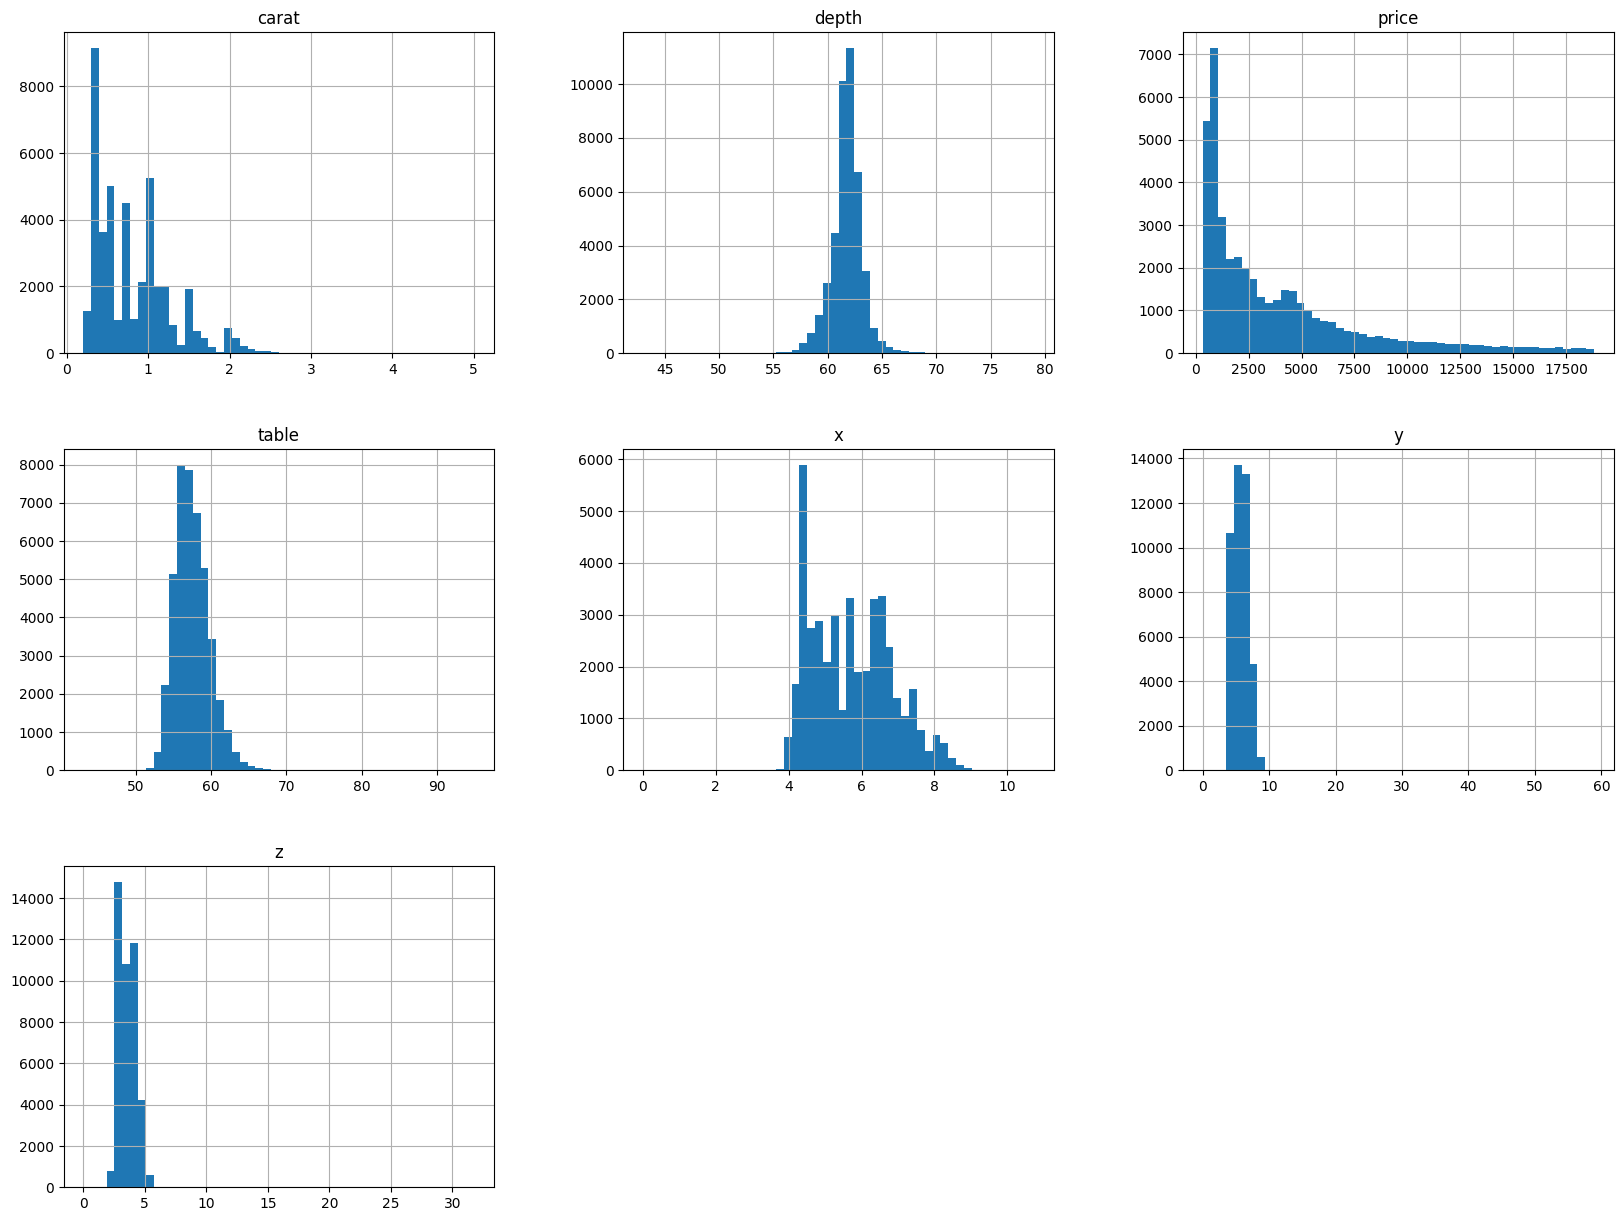

In [67]:

train = train.reindex(sorted(train.columns), axis=1)
train.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

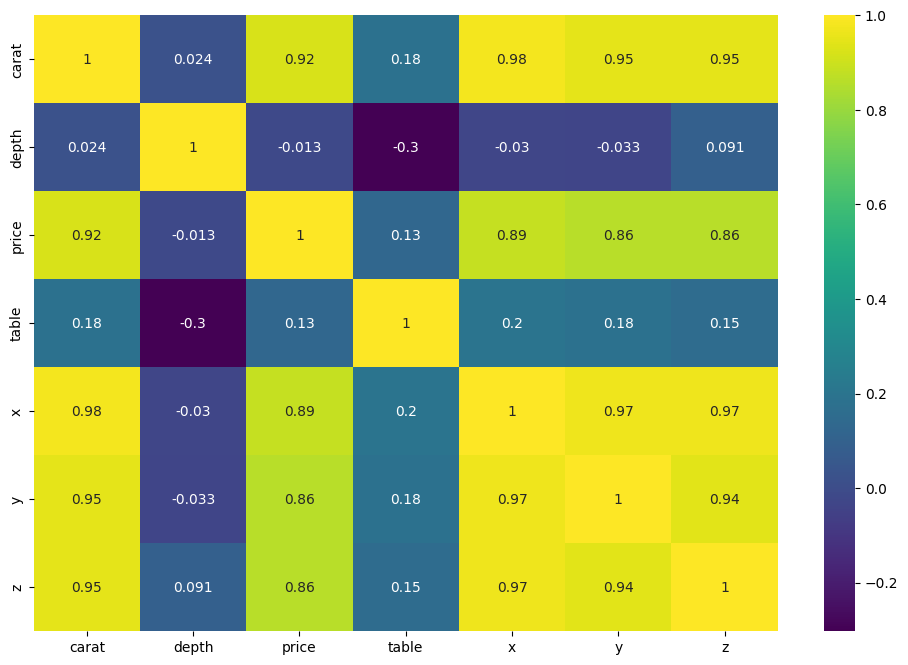

In [369]:

corr=train.corr(numeric_only=True)
plt.figure(figsize = (12,8))
sns.heatmap(corr,cmap="viridis",annot=True)

In [64]:
train.isna().sum()


carat    0
depth    0
price    0
table    0
x        0
y        0
z        0
rate     0
dtype: int64

In [11]:
(train == 0).sum(axis=0)

carat       0
clarity     0
color       0
cut         0
depth       0
price       0
table       0
x           5
y           4
z          17
dtype: int64

In [12]:
train[train["x"]==0]

,carat,clarity,color,cut,depth,price,table,x,y,z
1221,1.14,VS1,G,Fair,57.5,6381,67.0,0.0,0.00,0.0
6765,0.71,SI2,F,Good,64.1,2130,60.0,0.0,0.00,0.0
22171,1.00,VS2,H,Very Good,63.3,5139,53.0,0.0,0.00,0.0
24901,2.25,SI2,H,Premium,62.8,18034,59.0,0.0,0.00,0.0
39201,1.07,SI2,F,Ideal,61.6,4954,56.0,0.0,6.62,0.0


In [13]:
train[train["y"]==0]

,carat,clarity,color,cut,depth,price,table,x,y,z
1221,1.14,VS1,G,Fair,57.5,6381,67.0,0.0,0.0,0.0
6765,0.71,SI2,F,Good,64.1,2130,60.0,0.0,0.0,0.0
22171,1.00,VS2,H,Very Good,63.3,5139,53.0,0.0,0.0,0.0
24901,2.25,SI2,H,Premium,62.8,18034,59.0,0.0,0.0,0.0


In [14]:
train[train["z"]==0]

,carat,clarity,color,cut,depth,price,table,x,y,z
571,1.10,SI2,G,Premium,63.0,3696,59.0,6.50,6.47,0.0
903,2.25,SI1,I,Premium,61.3,15397,58.0,8.52,8.42,0.0
1221,1.14,VS1,G,Fair,57.5,6381,67.0,0.00,0.00,0.0
4980,1.50,I1,G,Good,64.0,4731,61.0,7.15,7.04,0.0
6765,0.71,SI2,F,Good,64.1,2130,60.0,0.00,0.00,0.0
11221,2.80,SI2,G,Good,63.8,18788,58.0,8.90,8.85,0.0
13727,2.02,VS2,H,Premium,62.7,18207,53.0,8.02,7.95,0.0
14265,1.01,SI2,F,Premium,59.2,3837,58.0,6.50,6.47,0.0
16971,1.00,SI2,G,Premium,59.1,3142,59.0,6.55,6.48,0.0
21061,1.15,VS2,G,Ideal,59.2,5564,56.0,6.88,6.83,0.0


In [117]:
train=train[(train.x != 0) & (train.y != 0) & (train.y != 0)]

In [118]:
#train['x'] = train['x'].replace(0, train["x"].median()) 
#train['y'] = train['y'].replace(0, train["y"].median()) 
train['newz']=train['depth']*(train['x']+train['y'])/2
train['newz']/=100
train['z']=round(train['newz'],2)
#train['z'].replace(0,train['newz'],inplace=True) 
train.drop('newz',axis=1,inplace=True)
train


,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [87]:
train[train["x"]==0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [18]:
train[train["y"]==0]

,carat,clarity,color,cut,depth,price,table,x,y,z


In [19]:
train[train["z"]==0]

,carat,clarity,color,cut,depth,price,table,x,y,z


In [20]:
(train == 0).sum(axis=0)

carat      0
clarity    0
color      0
cut        0
depth      0
price      0
table      0
x          0
y          0
z          0
dtype: int64

In [119]:
train['size']=train['x']*train['z']*train['y']

<Axes: >

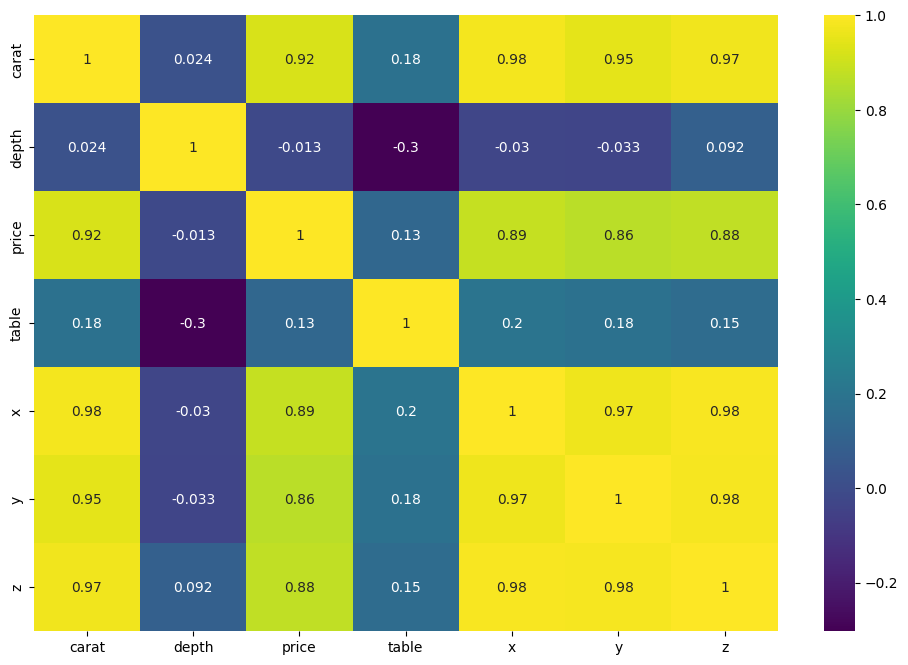

In [71]:
corr=train.corr(numeric_only=True)
plt.figure(figsize = (12,8))
sns.heatmap(corr,cmap="viridis",annot=True)

In [120]:
train.drop('x',axis=1,inplace=True)
train.drop('y',axis=1,inplace=True)
train.drop('z',axis=1,inplace=True)

<Axes: >

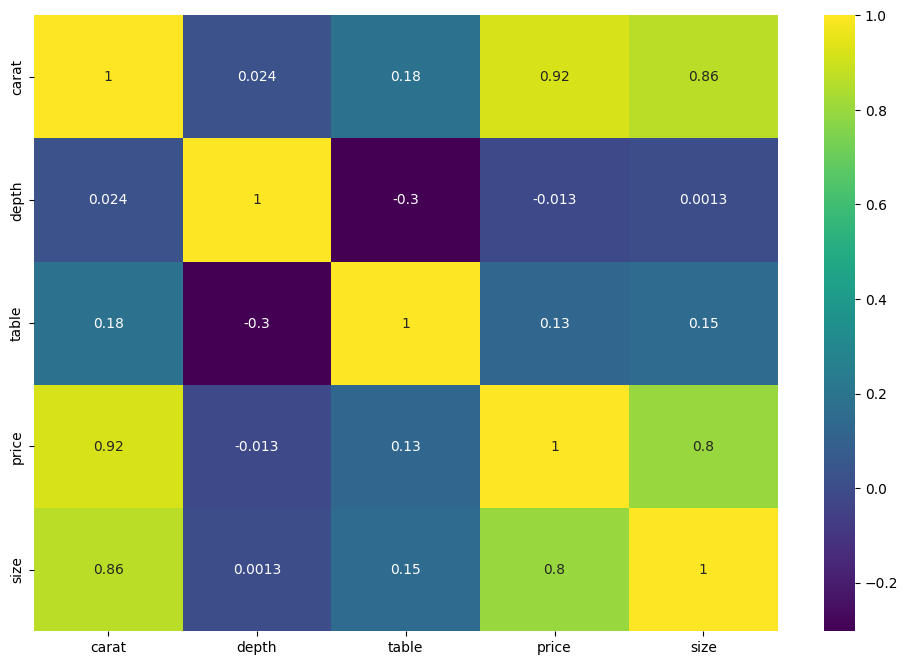

In [11]:
corr=train.corr(numeric_only=True)
plt.figure(figsize = (12,8))
sns.heatmap(corr,cmap="viridis",annot=True)

<Axes: xlabel='price', ylabel='color'>

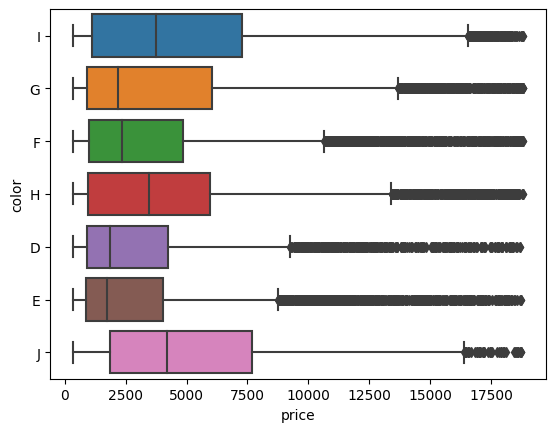

In [99]:
sns.boxplot(train, x="price", y="color")

In [121]:
temp_dict = {'D': 7,'E': 6,'F': 5,'G': 4,"H":3,"I":2,"J":1}
train["color"] = train.color.map(temp_dict)
#J (worst) to D (best)

<Axes: xlabel='price', ylabel='clarity'>

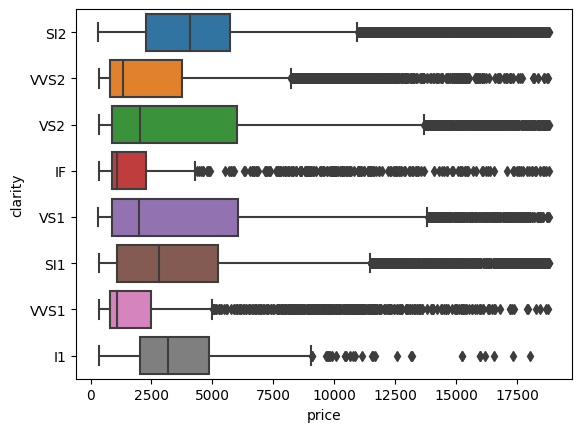

In [101]:
sns.boxplot(train, x="price", y="clarity")

In [122]:
temp_dict = {'I1': 1,'SI2': 2,'SI1': 3,'VS2': 4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
train["clarity"] = train.clarity.map(temp_dict)
#I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

<Axes: xlabel='price', ylabel='cut'>

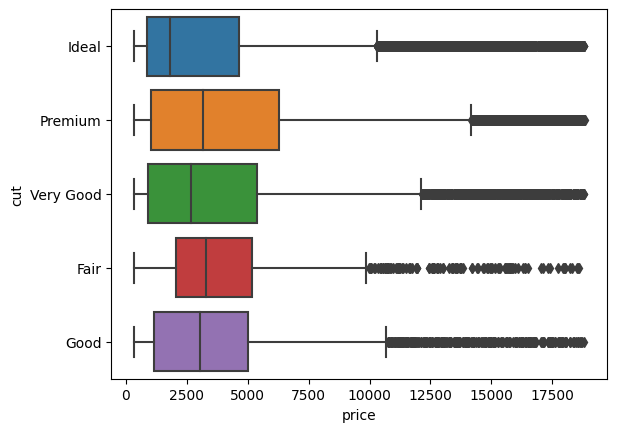

In [103]:
sns.boxplot(train, x="price", y="cut")

In [123]:
temp_dict = {'Fair': 1,'Good': 2,'Very Good': 3,'Premium': 4,"Ideal":5}
train["cut"] = train.cut.map(temp_dict)
#(Fair, Good, Very Good, Premium, Ideal)

In [163]:
train

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.44
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [124]:
cor=train.corr(numeric_only=True)
cor["price"].sort_values(ascending=False)

price      1.000000
carat      0.921887
size       0.798595
table      0.127927
depth     -0.013319
cut       -0.055677
clarity   -0.147097
color     -0.171285
Name: price, dtype: float64

In [125]:
train['rate']=train['color']+train['clarity']+train['cut']
train.drop('color',axis=1,inplace=True)
train.drop('clarity',axis=1,inplace=True)
train.drop('cut',axis=1,inplace=True)
train

,carat,depth,table,price,size,rate
0,1.06,61.8,57.0,4270,176.483340,9
1,1.51,60.9,58.0,15164,246.965796,14
2,0.32,61.3,56.0,828,52.943373,14
3,0.53,61.2,56.0,1577,86.422842,13
4,0.70,61.0,57.0,2596,115.315200,13
...,...,...,...,...,...,...
43147,0.52,61.5,56.0,1760,84.997584,15
43148,0.72,62.1,59.0,3016,115.946550,14
43149,0.44,61.5,58.0,990,72.801630,13
43150,0.31,60.2,58.0,734,51.419010,15


In [17]:
train.drop('table',axis=1,inplace=True)
train.drop('depth',axis=1,inplace=True)

In [18]:
train

,carat,color,price,x,y,z
0,1.06,2,4270,6.57,6.60,4.07
1,1.51,4,15164,7.38,7.42,4.51
2,0.32,5,828,4.43,4.41,2.71
3,0.53,4,1577,5.19,5.22,3.19
4,0.70,3,2596,5.76,5.72,3.50
...,...,...,...,...,...,...
43147,0.52,6,1760,5.16,5.18,3.18
43148,0.72,7,3016,5.70,5.73,3.55
43149,0.44,2,990,4.95,4.87,3.02
43150,0.31,6,734,4.38,4.43,2.65


In [126]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Marking the outliers in the DataFrame
outliers_mask = ((train[train.columns] < min_value) | (train[train.columns] > max_value))

# Removing outliers from the DataFrame
df_no_outliers = train[~outliers_mask.any(axis=1)]

# Counting the total number of outliers
total_outliers = outliers_mask.sum()

print("Total outliers for each variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())

Total outliers for each variable:
carat    1492
depth    2043
table     471
price    2835
size     1037
rate       17
dtype: int64
Total outliers: 7895


In [127]:

train=df_no_outliers

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

In [19]:

train

,carat,depth,table,price,size,rate
0,1.06,61.8,57.0,4270,176.483340,9
1,1.51,60.9,58.0,15164,246.965796,14
2,0.32,61.3,56.0,828,52.943373,14
3,0.53,61.2,56.0,1577,86.422842,13
4,0.70,61.0,57.0,2596,115.315200,13
...,...,...,...,...,...,...
43147,0.52,61.5,56.0,1760,84.997584,15
43148,0.72,62.1,59.0,3016,115.946550,14
43149,0.44,61.5,58.0,990,72.801630,13
43150,0.31,60.2,58.0,734,51.419010,15


In [256]:
train

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [129]:
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)
diamonds = train_set.drop("price", axis=1)
diamonds_labels = train_set["price"].copy()
diamonds_num=diamonds
#diamonds_num = diamonds.drop(["table","depth"], axis=1)
num_attribs = list(diamonds_num)
#cat_attribs = ["color","clarity","cut"]

In [80]:
diamonds_num

,carat,depth,table,x,y,z
36072,0.92,66.8,55.0,6.04,5.99,4.02
5871,1.07,60.2,57.0,6.70,6.59,4.00
6622,0.76,60.8,57.0,5.89,5.85,3.57
40485,0.38,61.6,59.0,4.65,4.70,2.88
41813,0.90,62.6,56.0,6.16,6.23,3.88
...,...,...,...,...,...,...
6267,0.57,61.5,57.0,5.35,5.38,3.30
11290,0.56,58.6,57.0,5.43,5.46,3.19
38233,0.56,61.9,55.0,5.31,5.25,3.27
860,1.50,59.4,60.0,7.54,7.50,4.47


In [130]:
from sklearn.preprocessing import MinMaxScaler

num_pipeline=Pipeline([
    ('Scaler',StandardScaler())
    #('Scaler',MinMaxScaler())
])

In [131]:
full_pipeline=ColumnTransformer([
    ('numerical attributes',num_pipeline,num_attribs),
    #('catigorcal attributes',OneHotEncoder(handle_unknown='ignore'),cat_attribs)
])


In [17]:
diamonds_prepared=preprocessor.fit_transform(diamonds)

NameError: name 'preprocessor' is not defined

In [132]:
diamonds_prepared = full_pipeline.fit_transform(diamonds)

In [90]:
diamonds_prepared=diamonds

In [133]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diamonds_prepared, diamonds_labels)

LinearRegression()

In [134]:
some_data = diamonds.iloc[:5]
some_labels = diamonds_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
#some_data_prepared=some_data

In [135]:
diamonds_predictions = lin_reg.predict(diamonds_prepared)
lin_rmse = mean_squared_error(diamonds_labels, diamonds_predictions, squared=False)
lin_rmse

861.4536522374259

In [136]:
# CODE HERE
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(diamonds_prepared, diamonds_labels)

DecisionTreeRegressor()

In [137]:
diamonds_predictions = tree_reg.predict(diamonds_prepared)
tree_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

41.090134808936305

In [138]:
# CODE HERE
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_reg = KNeighborsRegressor()
KNeighbors_reg.fit(diamonds_prepared, diamonds_labels)


KNeighborsRegressor()

In [139]:
diamonds_predictions = KNeighbors_reg.predict(diamonds_prepared)
KNeighbors_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
KNeighbors_rmse = np.sqrt(KNeighbors_mse)
KNeighbors_rmse

498.2936302478764

In [164]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, diamonds_prepared, diamonds_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [165]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1920.23648669 1966.51675207 1894.01119348 1903.0017792  1868.99077754
 1890.29408108 1989.60824663 1825.40217669 1964.95538108 1890.47196255]
Mean: 1911.3488837007408
Standard deviation: 47.48803369526485


In [166]:
scores = cross_val_score(lin_reg, diamonds_prepared, diamonds_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)
display_scores(lin_reg_rmse_scores)

Scores: [1459.53650752 1475.85423521 1449.01278794 1635.66539553 1498.43507206
 1573.16806775 1543.6556448  1448.99439959 1526.95841866 1505.28836789]
Mean: 1511.6568896949298
Standard deviation: 56.99508895589213


In [140]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=20, random_state=42)
forest_reg.fit(diamonds_prepared, diamonds_labels)
diamonds_predictions = forest_reg.predict(diamonds_prepared)
forest_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

231.84716147909995

In [344]:
scores = cross_val_score(forest_reg, diamonds_prepared, diamonds_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_reg_rmse_scores = np.sqrt(-scores)
display_scores(forest_reg_rmse_scores)

Scores: [579.94940005 564.59655718 514.77743955 556.13700814 535.62797432
 545.13787149 574.77518624 563.08234627 596.53317371 597.29706624]
Mean: 562.7914023202011
Standard deviation: 24.83871922660734


In [141]:
cbr=CatBoostRegressor(verbose=0)
cbr.fit(diamonds_prepared,diamonds_labels)
diamonds_predictions = cbr.predict(diamonds_prepared)
cbr_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
cbr_rmse = np.sqrt(cbr_mse)
cbr_rmse

487.07558201472

In [142]:
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

In [157]:
X_test_prepared = full_pipeline.transform(X_test)
#X_test_prepared=X_test
final_predictions = LGBMReg.predict(X_test_prepared)

In [158]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

555.7186107545821

In [51]:
test_set

,carat,color,price,x,y,z
33230,0.53,5,2290,5.22,5.15,3.22
41644,0.77,4,3124,5.81,5.84,3.66
34519,0.91,4,4731,6.22,6.18,3.84
39199,2.00,2,16068,8.20,8.17,4.80
32010,0.54,4,1920,5.23,5.27,3.26
...,...,...,...,...,...,...
29522,0.31,7,571,4.28,4.30,2.72
31219,0.38,4,766,4.63,4.66,2.79
32726,0.60,2,1565,5.36,5.41,3.43
25719,0.33,2,480,4.45,4.48,2.74


In [52]:
param_grid = [
    {'n_estimators': [20,10,100], 'max_features': [1,2,3,4,5]},
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(diamonds_prepared, diamonds_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [1, 2, 3, 4, 5],
                          'n_estimators': [20, 10, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1219.7420838619769 {'max_features': 1, 'n_estimators': 20}
1246.3143586265371 {'max_features': 1, 'n_estimators': 10}
1197.5124697963709 {'max_features': 1, 'n_estimators': 100}
1222.830832490895 {'max_features': 2, 'n_estimators': 20}
1252.0824529559045 {'max_features': 2, 'n_estimators': 10}
1202.159748965269 {'max_features': 2, 'n_estimators': 100}
1225.4152863515587 {'max_features': 3, 'n_estimators': 20}
1246.336099543374 {'max_features': 3, 'n_estimators': 10}
1209.2940994291075 {'max_features': 3, 'n_estimators': 100}
1239.9000415332537 {'max_features': 4, 'n_estimators': 20}
1260.2193009005478 {'max_features': 4, 'n_estimators': 10}
1214.7395709566397 {'max_features': 4, 'n_estimators': 100}
1245.6708431803306 {'max_features': 5, 'n_estimators': 20}
1263.9558645371817 {'max_features': 5, 'n_estimators': 10}
1221.122022104111 {'max_features': 5, 'n_estimators': 100}


In [151]:
import xgboost as xgb
xgbreg=xgb.XGBRegressor()
xgbreg.fit(diamonds_prepared, diamonds_labels)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [152]:
some_data = diamonds.iloc[:5]
some_labels = diamonds_labels.iloc[:5]
#some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared = some_data
diamonds_predictions = xgbreg.predict(diamonds_prepared)
xgbreg_rmse = mean_squared_error(diamonds_labels, diamonds_predictions, squared=False)
xgbreg_rmse

441.46954125942926

In [155]:
from lightgbm import LGBMRegressor
LGBMReg=LGBMRegressor()
LGBMReg.fit(diamonds_prepared, diamonds_labels)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 30335, number of used features: 5
[LightGBM] [Info] Start training from score 3106.128202


LGBMRegressor()

In [156]:
some_data = diamonds.iloc[:5]
some_labels = diamonds_labels.iloc[:5]
#some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared = some_data
diamonds_predictions = LGBMReg.predict(diamonds_prepared)
LGBMReg_rmse = mean_squared_error(diamonds_labels, diamonds_predictions, squared=False)
LGBMReg_rmse

511.5556673331272

In [67]:
train

,carat,depth,price,table,x,y,z,rate
0,1.06,61.8,4270,57.0,6.57,6.60,4.07,9
1,1.51,60.9,15164,58.0,7.38,7.42,4.51,14
2,0.32,61.3,828,56.0,4.43,4.41,2.71,14
3,0.53,61.2,1577,56.0,5.19,5.22,3.19,13
4,0.70,61.0,2596,57.0,5.76,5.72,3.50,13
...,...,...,...,...,...,...,...,...
43147,0.52,61.5,1760,56.0,5.16,5.18,3.18,15
43148,0.72,62.1,3016,59.0,5.70,5.73,3.55,14
43149,0.44,61.5,990,58.0,4.95,4.87,3.02,13
43150,0.31,60.2,734,58.0,4.38,4.43,2.65,15


In [159]:
temp_dict = {'D': 7,'E': 6,'F': 5,'G': 4,"H":3,"I":2,"J":1}
test["color"] = test.color.map(temp_dict)
#J (worst) to D (best)
temp_dict = {'I1': 1,'SI2': 2,'SI1': 3,'VS2': 4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
test["clarity"] = test.clarity.map(temp_dict)
#I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
temp_dict = {'Fair': 1,'Good': 2,'Very Good': 3,'Premium': 4,"Ideal":5}
test["cut"] = test.cut.map(temp_dict)
#(Fair, Good, Very Good, Premium, Ideal)
test

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,5,4,6,61.1,57.0,4.52,4.48,2.75
1,2,0.71,4,6,4,62.7,58.0,5.74,5.68,3.58
2,3,0.44,3,2,5,62.8,56.0,4.83,4.88,3.05
3,4,0.81,4,6,2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,5,4,7,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,5,3,5,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,5,4,4,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,5,6,7,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,4,6,2,61.0,60.0,6.68,6.66,4.07


In [160]:
test['rate']=test['color']+test['clarity']+test['cut']
test.drop('color',axis=1,inplace=True)
test.drop('clarity',axis=1,inplace=True)
test.drop('cut',axis=1,inplace=True)



In [161]:
test['size']=test['x']*test['z']*test['y']
test.drop('x',axis=1,inplace=True)
test.drop('y',axis=1,inplace=True)
test.drop('z',axis=1,inplace=True)

In [44]:
(test == 0).sum(axis=0)

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          3
z          3
dtype: int64

In [ ]:
test[test["y"]==0]

In [162]:
ID=test['Id']
test.drop('Id',axis=1,inplace=True)
test


,carat,depth,table,rate,size
0,0.34,61.1,57.0,15,55.686400
1,0.71,62.7,58.0,14,116.719456
2,0.44,62.8,56.0,10,71.889720
3,0.81,60.1,59.0,12,134.037855
4,0.40,61.2,56.0,16,66.435840
...,...,...,...,...,...
10783,0.57,60.9,56.0,13,93.309024
10784,1.05,60.8,57.0,13,175.903140
10785,0.71,62.3,55.0,18,115.338080
10786,1.11,61.0,60.0,12,181.069416


In [163]:
test_prepared = full_pipeline.transform(test)
#test_prepared=test
price = LGBMReg.predict(test_prepared)

In [51]:
final_model = grid_search.best_estimator_

test_prepared = full_pipeline.transform(test)
price = final_model.predict(test_prepared)


NameError: name 'grid_search' is not defined

In [164]:
data={"ID":ID,'price':price}
sub=pd.DataFrame(data)
sub

,ID,price
0,1,812.441474
1,2,2962.026148
2,3,790.619477
3,4,3056.973542
4,5,1096.167485
...,...,...
10783,10784,1653.638805
10784,10785,6179.163019
10785,10786,4626.657966
10786,10787,5550.557864


In [165]:
sub.to_csv('finaltestLGBMReg.csv',index=False)

In [282]:
# for handling Missing Values
from sklearn.impute import SimpleImputer 

# for Feature Scaling
from sklearn.preprocessing import StandardScaler 

# for Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder 

## for creating pipelines
from sklearn.pipeline import Pipeline

#for combining pipelines
from sklearn.compose import ColumnTransformer

In [283]:
categorical_cols = diamonds_num.select_dtypes(include='object').columns
numerical_cols = diamonds_num.select_dtypes(exclude='object').columns

In [284]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())
    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [141]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1

max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Marking the outliers in the DataFrame
outliers_mask = ((test[test.columns] < min_value) | (test[test.columns] > max_value))

# Removing outliers from the DataFrame
df_no_outliers = test[~outliers_mask.any(axis=1)]

# Counting the total number of outliers
total_outliers = outliers_mask.sum()

print("Total outliers for each variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())

Total outliers for each variable:
Id           0
carat      385
cut          0
color        0
clarity      0
depth      583
table      133
x           11
y           10
z           11
dtype: int64
Total outliers: 1133
